In [11]:
import mne
mne.set_log_level('error')
import numpy as np
import matplotlib.pyplot as plt


In [15]:
subjects = [_ for _ in range(1,110)]
run = [_ for _ in range(1,15)]  
dic_runs = {}
for _ in run:
    file_path = f'files/S020/S020R{_:02}.edf'
    dic_runs[f'raw{_}'] = mne.io.read_raw_edf(file_path)

In [16]:
replacement = {
    'Fc': 'FC',
    'Cp': 'CP',
    'Af': 'AF',
    'Ft': 'FT',
    'Tp': 'TP',
    'Po': 'PO'   
}
new_names = {
    name : name.replace(".", "") for name in dic_runs['raw1'].info['ch_names']
}


for key in new_names.keys():
    for old_string, new_string in replacement.items():
        new_names[key] = new_names[key].replace(old_string, new_string)

montage = 'standard_1020'
for _ in run:
        dic_runs[f'raw{_}'].rename_channels(new_names)
        dic_runs['raw1'].set_montage(montage)

In [22]:
dic_runs['raw3'].plot()

In [21]:
mne.viz.plot_montage('standard_1020', sphere=(0, 0.016, 0, 0.1))

TypeError: montage must be an instance of DigMontage, got <class 'str'> instead.

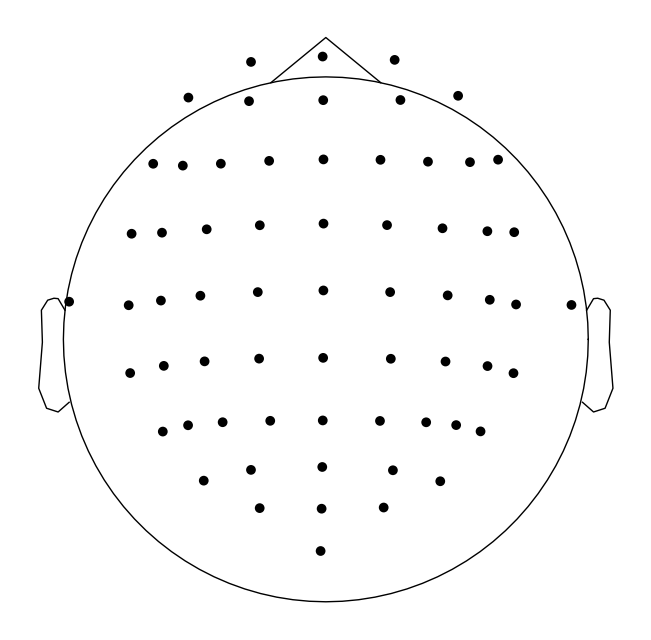

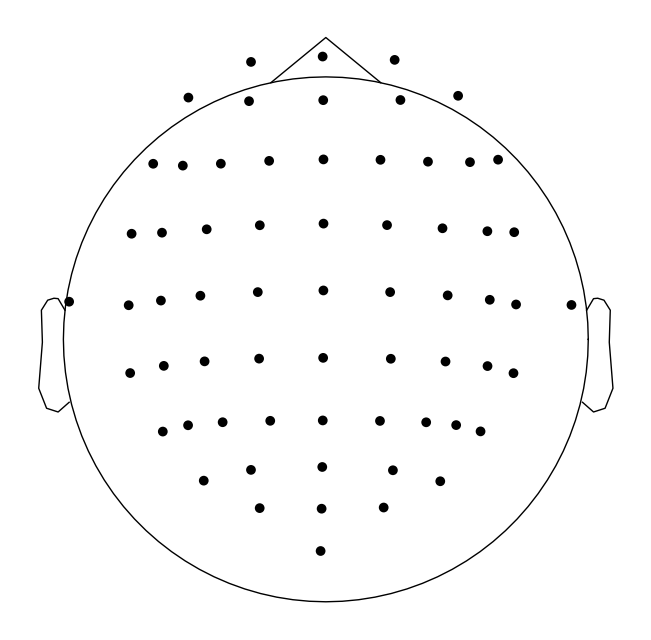

In [20]:
dic_runs['raw1'].info.plot_sensors()


/home/elia/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


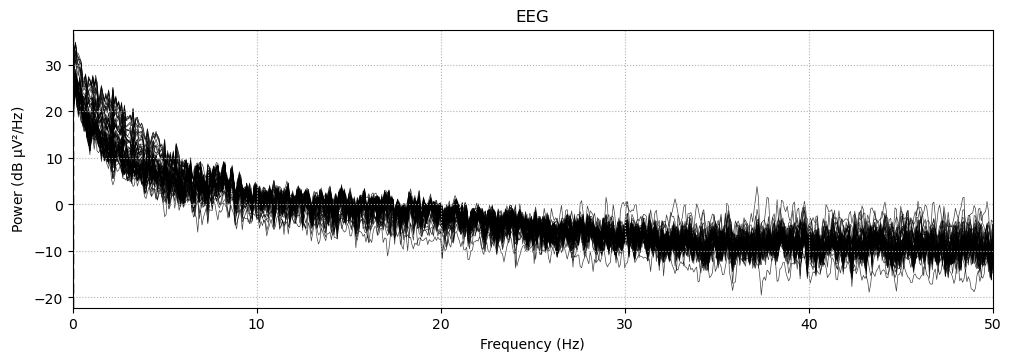

In [17]:
dic_runs['raw3'].compute_psd(fmax=50).plot(picks="data", amplitude=False)
dic_runs['raw3'].plot(duration=5, n_channels=64)

In [71]:
montage = 'easycap-M1'
dic_runs['raw1'].set_montage(montage)

ValueError: DigMontage is only a subset of info. There are 2 channel positions not present in the DigMontage. The channels missing from the montage are:

['T9', 'T10'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

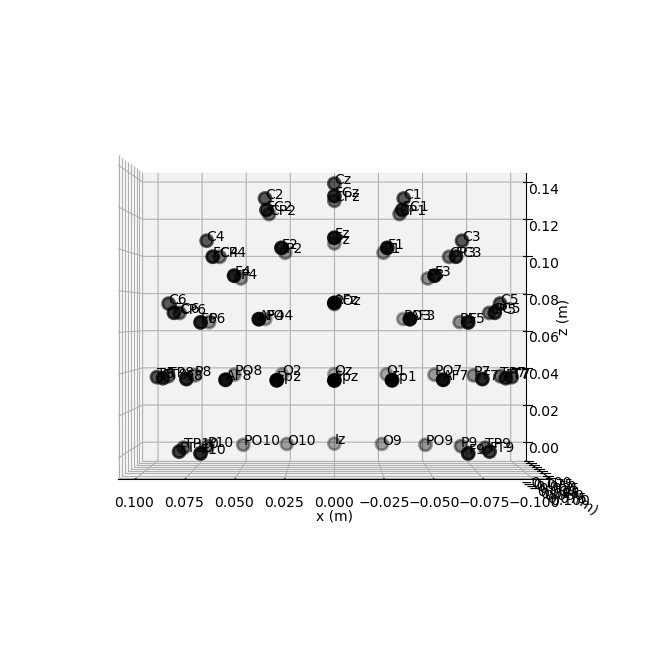

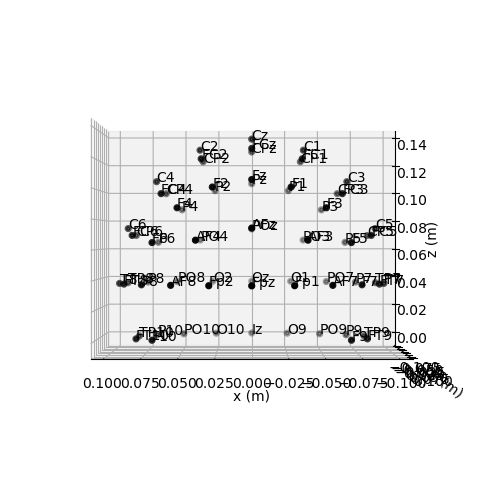

In [9]:
montage = mne.channels.make_standard_montage('easycap-M1', head_size='auto')
mne.viz.plot_montage(montage, kind='3d')


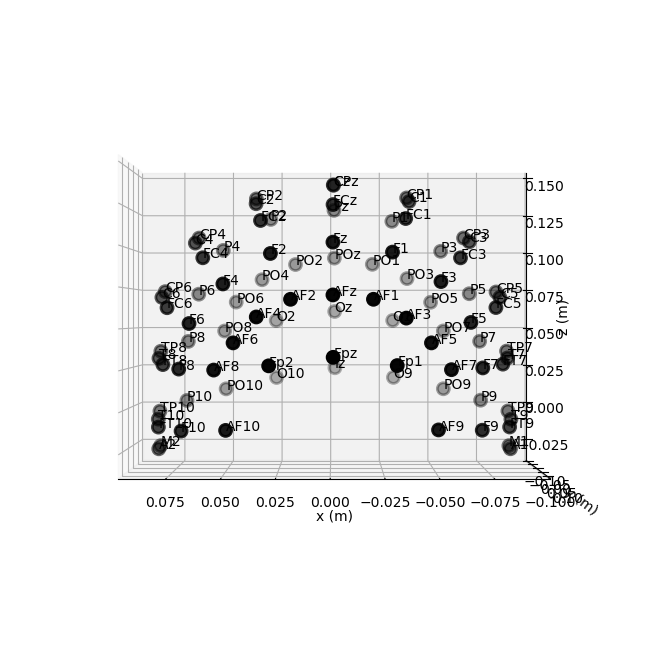

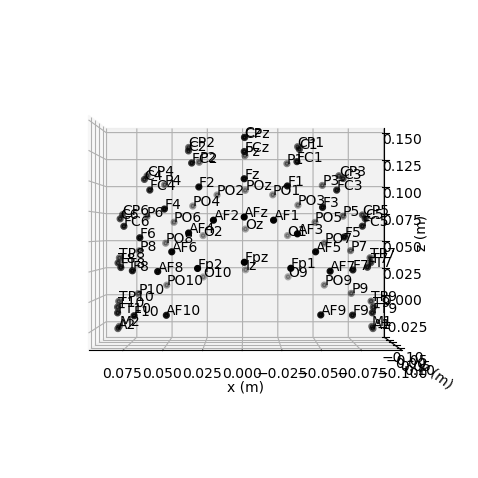

In [10]:
montage = mne.channels.make_standard_montage('standard_1020', head_size='auto')
mne.viz.plot_montage(montage, kind='3d')


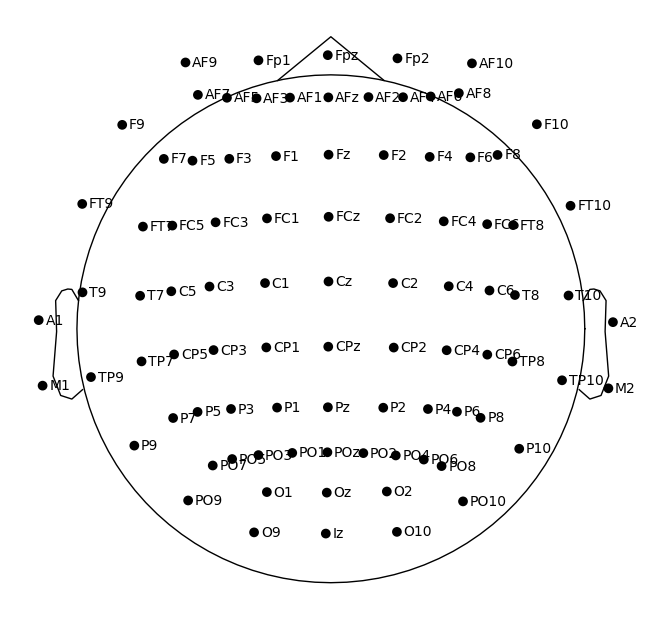

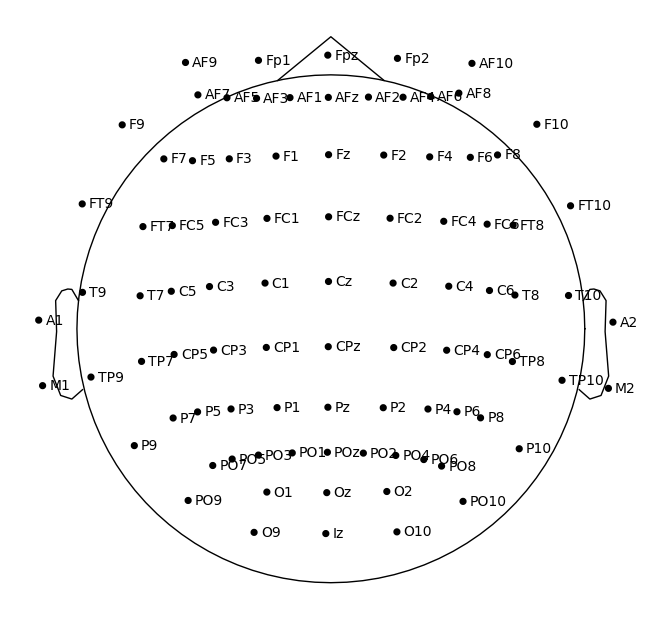

In [33]:
montages = mne.channels.get_builtin_montages(descriptions=True)
montage = mne.channels.make_standard_montage('standard_1020')
montage.plot(show_names=True)


In [65]:

replacement = {
    'Fc': 'FC',
    'Cp': 'CP',
    'Af': 'AF',
    'Ft': 'FT',
    'Tp': 'TP',
    'Po': 'PO'   
}
new_names = {
    name : name.replace(".", "") for name in dic_runs['raw1'].info['ch_names']
}


for key in new_names.keys():
    for old_string, new_string in replacement.items():
        new_names[key] = new_names[key].replace(old_string, new_string)


Fc5.
Fc3.
Fc1.
Fcz.
Fc2.
Fc4.
Fc6.
C5..
C3..
C1..
Cz..
C2..
C4..
C6..
Cp5.
Cp3.
Cp1.
Cpz.
Cp2.
Cp4.
Cp6.
Fp1.
Fpz.
Fp2.
Af7.
Af3.
Afz.
Af4.
Af8.
F7..
F5..
F3..
F1..
Fz..
F2..
F4..
F6..
F8..
Ft7.
Ft8.
T7..
T8..
T9..
T10.
Tp7.
Tp8.
P7..
P5..
P3..
P1..
Pz..
P2..
P4..
P6..
P8..
Po7.
Po3.
Poz.
Po4.
Po8.
O1..
Oz..
O2..
Iz..


In [30]:
dic_runs['raw1'].info['ch_names']

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [10]:
montages

[('standard_1005',
  'Electrodes are named and positioned according to the international 10-05 system (343+3 locations)'),
 ('standard_1020',
  'Electrodes are named and positioned according to the international 10-20 system (94+3 locations)'),
 ('standard_alphabetic',
  'Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)'),
 ('standard_postfixed',
  'Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)'),
 ('standard_prefixed',
  'Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)'),
 ('standard_primed',
  "Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)"),
 ('biosemi16', 'BioSemi cap with 16 electrodes (16+3 locations)'),
 ('biosemi32', 'BioSemi cap with 32 electrodes (32+3 locations)'),
 ('biosemi64', 'BioSemi cap w

In [4]:
dic_runs['raw4'].info

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>

In [5]:
dic_runs['raw4'].info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [28]:
dic_runs['raw1'].info['ch_names']

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

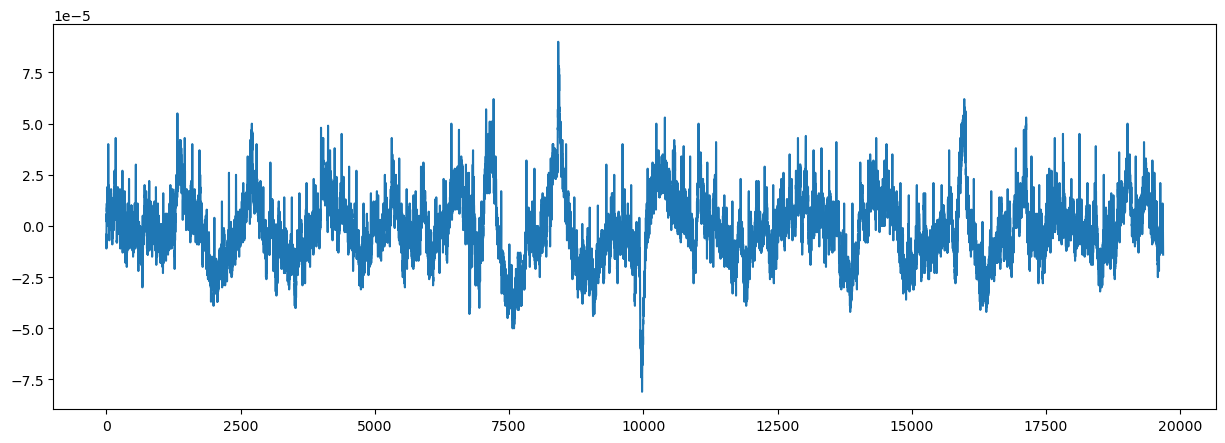

In [29]:
channel = 'Oz..'
start_time = 1.0    # in seconds
end_time = 2

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(dic_runs['raw4'].get_data(picks=[channel]).T)
plt.show()

Text(0, 0.5, 'Voltage (uV)')

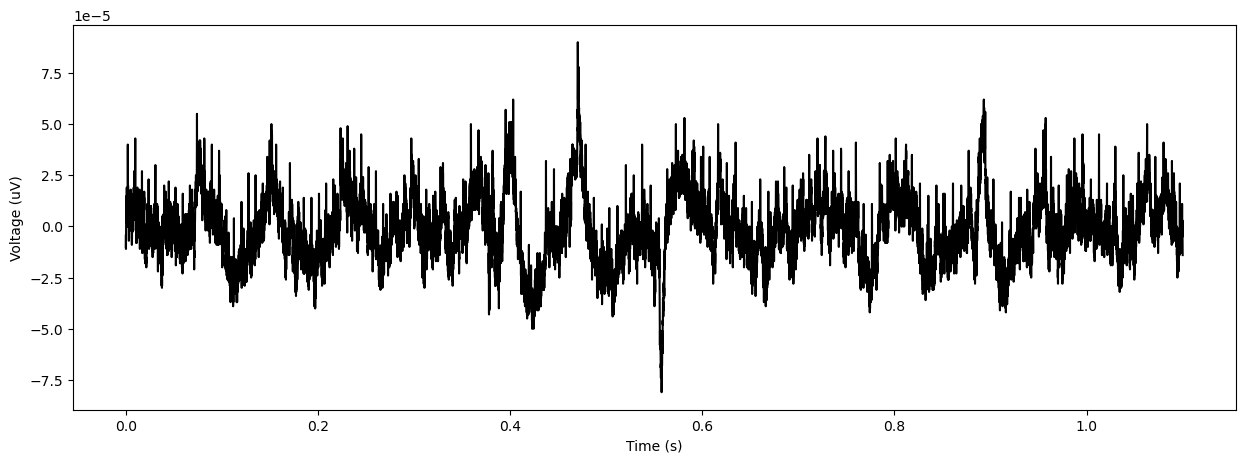

In [32]:
channel = 'Oz..'
start_time = 1.0    # in seconds
end_time = 1.1

# Get the data from channel Oz, from 1000 - 1100 ms
data = dic_runs['raw4'].get_data(picks=[channel]).T

# Get the time values
times = np.linspace(0, end_time, num=data.shape[0])

# Plot the data
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(times, data, color='black')

# Label the axes
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

In [34]:
dic_runs['raw4'].describe()

<RawEDF | S020R04.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fc5.  EEG   µV       -78.00     -14.00      -4.00       7.00     123.00
 1  Fc3.  EEG   µV       -80.00     -14.00      -2.00       9.00     112.00
 2  Fc1.  EEG   µV       -80.00     -13.00      -3.00       7.00     108.00
 3  Fcz.  EEG   µV       -72.00     -13.00      -3.00       9.00     105.00
 4  Fc2.  EEG   µV       -80.00     -13.00      -2.00       8.00     103.00
 5  Fc4.  EEG   µV       -87.00     -10.00      -1.00       8.00      99.00
 6  Fc6.  EEG   µV       -77.00     -10.00      -1.00       8.00      90.00
 7  C5..  EEG   µV       -75.00     -10.00      -1.00       9.00      96.00
 8  C3..  EEG   µV       -89.00     -10.00      -1.00       8.00      94.00
 9  C1..  EEG   µV       -85.00     -10.00       0.00      10.00      97.00
10  Cz..  EEG   µV       -74.00     -11.00      -1.00       9.00      81.00
11  C2..  EEG   µV   

In [98]:
montages = mne.channels.get_builtin_montages(descriptions=False)

In [100]:
for montage in montages:
    try:
        dic_runs['raw4'].set_montage(montage)
        print(f"YEPPYYYYYYYYY {montage} does work")
    except:
        print(f"{montage} does not work")



standard_1005 does not work
standard_1020 does not work
standard_alphabetic does not work
standard_postfixed does not work
standard_prefixed does not work
standard_primed does not work
biosemi16 does not work
biosemi32 does not work
biosemi64 does not work
biosemi128 does not work
biosemi160 does not work
biosemi256 does not work
easycap-M1 does not work
easycap-M10 does not work
easycap-M43 does not work
EGI_256 does not work
GSN-HydroCel-32 does not work
GSN-HydroCel-64_1.0 does not work
GSN-HydroCel-65_1.0 does not work
GSN-HydroCel-128 does not work
GSN-HydroCel-129 does not work
GSN-HydroCel-256 does not work
GSN-HydroCel-257 does not work
mgh60 does not work
mgh70 does not work
artinis-octamon does not work
artinis-brite23 does not work
brainproducts-RNP-BA-128 does not work


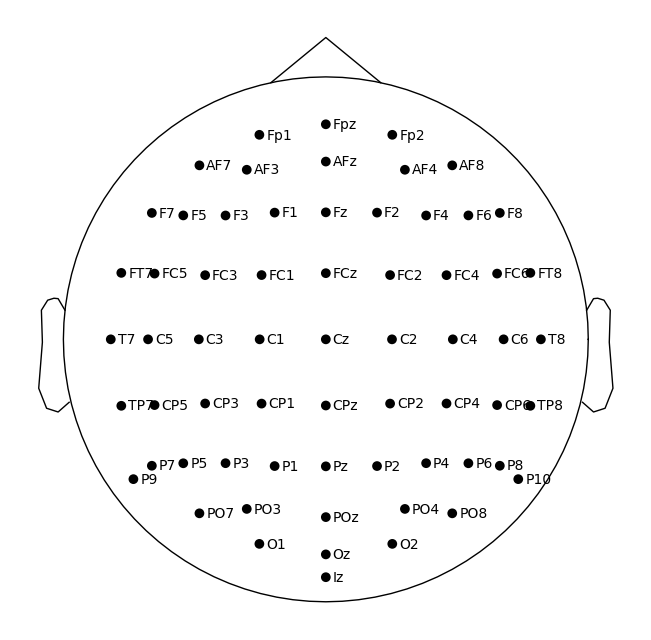

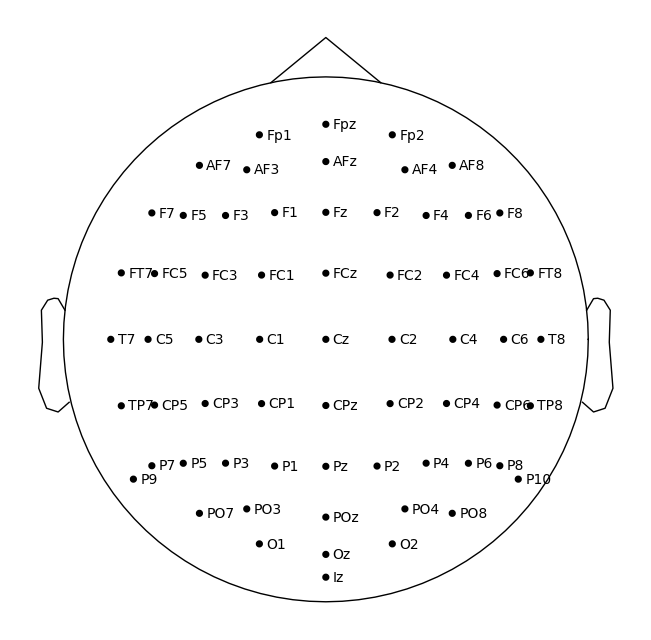

In [129]:
montage = mne.channels.make_standard_montage('biosemi64')
montage.plot(show_names=True)


BUILT-IN LAYOUTS
================
CTF-275.lout
CTF151.lay
CTF275.lay
EEG1005.lay
EGI256.lout
GeodesicHeadWeb-130.lout
GeodesicHeadWeb-280.lout
KIT-125.lout
KIT-157.lout
KIT-160.lay
KIT-AD.lout
KIT-AS-2008.lout
KIT-UMD-3.lout
Neuromag_122.lout
Vectorview-all.lout
Vectorview-grad.lout
Vectorview-grad_norm.lout
Vectorview-mag.lout
biosemi.lay
magnesWH3600.lout

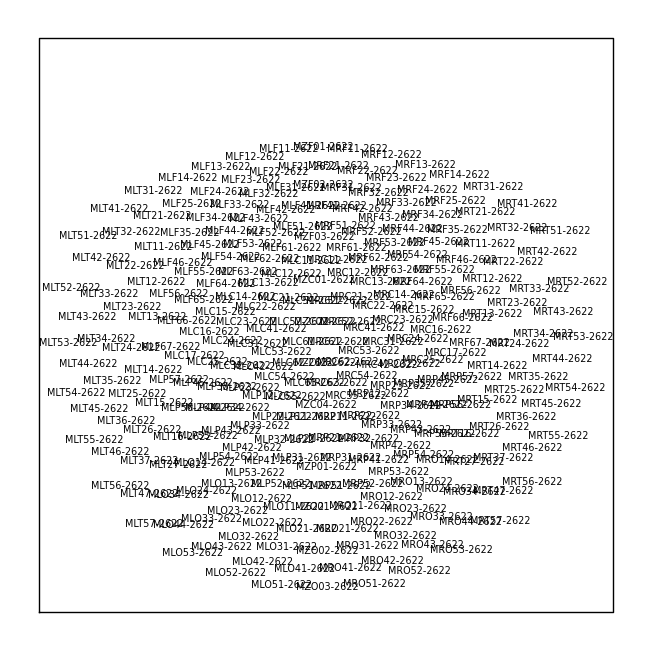

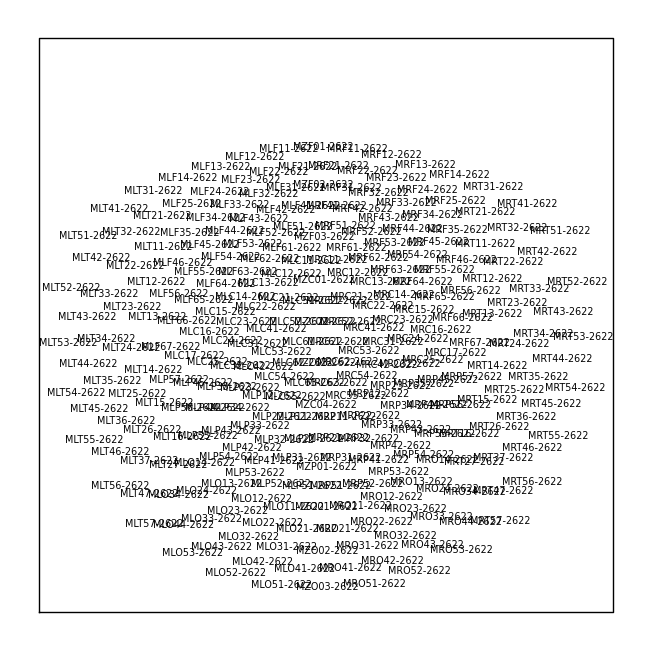

In [151]:
layout = mne.channels.read_layout("CTF-275")
layout.plot()

In [103]:

rename_channels = {name_channel : name_channel.replace(".", "").upper() for name_channel in dic_runs['raw4'].info['ch_names']}
dic_runs['raw4'].rename_channels(rename_channels)

<RawEDF | S020R04.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>

In [50]:
dic_runs['raw4'].info['ch_names']

['Fc5',
 'Fc3',
 'Fc1',
 'Fcz',
 'Fc2',
 'Fc4',
 'Fc6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'Cp5',
 'Cp3',
 'Cp1',
 'Cpz',
 'Cp2',
 'Cp4',
 'Cp6',
 'Fp1',
 'Fpz',
 'Fp2',
 'Af7',
 'Af3',
 'Afz',
 'Af4',
 'Af8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'Ft7',
 'Ft8',
 'T7',
 'T8',
 'T9',
 'T10',
 'Tp7',
 'Tp8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'Po7',
 'Po3',
 'Poz',
 'Po4',
 'Po8',
 'O1',
 'Oz',
 'O2',
 'Iz']

NameError: name 'read_montage' is not defined

In [105]:
montages

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [110]:
dic_runs['raw4'].set_montage('easycap-M1')

ValueError: DigMontage is only a subset of info. There are 14 channel positions not present in the DigMontage. The channels missing from the montage are:

['FCZ', 'CZ', 'CPZ', 'FP1', 'FPZ', 'FP2', 'AFZ', 'FZ', 'T9', 'T10', 'PZ', 'POZ', 'OZ', 'IZ'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [19]:
dic_runs['raw4'].get_data().shape

(64, 19680)

In [20]:
dic_runs['raw4'].info['sfreq']

160.0

In [21]:
dic_runs['raw4']._data.shape[1] / dic_runs['raw4'].info['sfreq']

123.0

Effective window size : 12.800 (s)


Plotting power spectral density (dB=True).


/home/elia/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


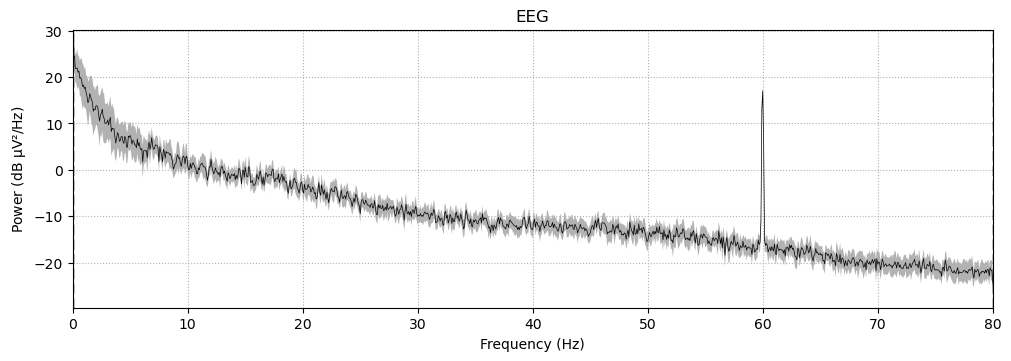

In [28]:
dic_runs['raw8'].compute_psd(tmax=np.inf,fmin=0, fmax=80).plot(average=True, amplitude=False, picks="data", exclude="bads")

#fig8 = dic_runs['raw8'].compute_psd().plot(average=True, amplitude=False, picks="data", exclude="bads")



In [49]:
dic_runs['raw2'].load_data()
raw = dic_runs['raw2'].copy()

In [50]:
raw.filter(l_freq=1.0, h_freq=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | S060R02.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [51]:
raw.plot()

Channels marked as bad:
['Cp4.']


In [39]:
dic_runs['raw13'].plot()

Channels marked as bad:
none


In [5]:
dic_runs['raw5'].plot(exclude="bads" )

ValueError: Generating an artificial ECG channel can only be done for MEG data

In [10]:
dic_runs['raw7'].annotations


<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>

In [11]:
raw.plot()

Channels marked as bad:
none


In [2]:
for i in [1, 2, "ciao"]:
    print(i)

1
2
ciao
